In [1]:
import numpy as np
import pandas as pd
import anndata
import scanpy as sc
from ALLCools.mcds import MCDS
from ALLCools.clustering import one_vs_rest_dmg, PairwiseDMG


import xarray as xr
import pybedtools
import dask
from ALLCools.plot import *
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
metadata_path = './CellMetadata.AfterQC.pdpkl'
adata_path = './adata.with_coords.h5ad'
cluster_col = 'L1'
mc_type = None

top_n_markers = 1000
# auroc_cutoff = 0.8
auroc_cutoff = 0.6

# adj_p_cutoff = 0.001
adj_p_cutoff = 0.05

# fc_cutoff = 0.8
fc_cutoff = 1

max_cluster_cells = 2000
max_other_fold = 5


gene_annotation_path = '~/refs/human/hg38/gencode/v33/gencode.v33.basic.annotation.gene.flat.tsv.gz'
obs_dim = 'cell'
var_dim = 'gene'
chrom_to_remove = ['chrM']

min_cov = 5
min_cov_ratio = 0.002


mcds_path_list = [
]

gene_mcds_path_pattern = None


pw_top_n_markers = 50
pw_auroc_cutoff = 0.8
pw_max_cell_per_group = 1000
pw_adj_p_cutoff = 0.005
pw_delta_rate_cutoff = 0.5
random_state = 0
n_jobs = 30


In [3]:
# Parameters
adata_path = "./adata.with_coords.h5ad"
cluster_col = "L3"
mc_type = None
top_n_markers = 200
auroc_cutoff = 0.7
adj_p_cutoff = 0.01
fc_cutoff = 0.8
max_cluster_cells = 2000
max_other_fold = 5
gene_annotation_path = "~/refs/human/hg38/gencode/v33/gencode.v33.basic.annotation.gene.flat.tsv.gz"
obs_dim = "cell"
var_dim = "gene"
chrom_to_remove = ["chrM"]
min_cov = 5
min_cov_ratio = 0.002
mcds_path_list = [
    "~/mcds/hba_pool18_h1930002_A1C.mcds",
    "~/mcds/hba_pool76_h1930002_BL-La.mcds",
    "~/mcds/hba_pool88_h1930002_A38.mcds",
    "~/mcds/hba_pool2_h1930001_MTG.mcds",
    "~/mcds/hba_pool49_h1930002_SI.mcds",
    "~/mcds/hba_pool11_h1930001_ACC.mcds",
    "~/mcds/hba_pool87_h1930001_CA1C-CA2C-CA3C-DGC-CA4C.mcds",
    "~/mcds/hba_pool9_h1930001_FI.mcds",
    "~/mcds/hba_pool84_h1930001_Idg.mcds",
    "~/mcds/hba_pool23_h1930002_S1C.mcds",
    "~/mcds/hba_pool59_h1930001_DGC-CA4Cpy.mcds",
    "~/mcds/hba_pool39_h1930002_Pu.mcds",
    "~/mcds/hba_pool56_h1930001_MEC.mcds",
    "~/mcds/hba_pool46_h1930001_CBL.mcds",
    "~/mcds/hba_pool26_h1930002_Pro.mcds",
    "~/mcds/hba_pool71_h1930002_Cla.mcds",
    "~/mcds/hba_pool48_h1930002_BNST_a.mcds",
    "~/mcds/hba_pool54_h1930001_CMN.mcds",
    "~/mcds/hba_pool50_h1930001_BM_a.mcds",
    "~/mcds/hba_pool17_h1930001_A44-A45.mcds",
    "~/mcds/hba_pool64_h1930002_IC.mcds",
    "~/mcds/hba_pool66_h1930001_CA1R-CA2R-CA3R-DGR-CA4R.mcds",
    "~/mcds/hba_pool7_h1930002_V2.mcds",
    "~/mcds/hba_pool40_h1930001_TH-TL.mcds",
    "~/mcds/hba_pool3_h1930001_CBV.mcds",
    "~/mcds/hba_pool74_h1930001_IC.mcds",
    "~/mcds/hba_pool13_h1930002_FI.mcds",
    "~/mcds/hba_pool33_h1930002_A19.mcds",
    "~/mcds/hba_pool3_h1930002_CBV.mcds",
    "~/mcds/hba_pool65_h1930001_BL-La.mcds",
    "~/mcds/hba_pool43_h1930002_CaB.mcds",
    "~/mcds/hba_pool20_h1930001_A5-A7.mcds",
    "~/mcds/hba_pool51_h1930002_CMN_a.mcds",
    "~/mcds/hba_pool42_h1930001_CaB.mcds",
    "~/mcds/hba_pool52_h1930002_MD-Re_a.mcds",
    "~/mcds/hba_pool45_h1930001_SI.mcds",
    "~/mcds/hba_pool38_h1930001_Pu.mcds",
    "~/mcds/hba_pool8_h1930001_V1C.mcds",
    "~/mcds/hba_pool12_h1930002_V1C.mcds",
    "~/mcds/hba_pool10_h1930001_A46.mcds",
    "~/mcds/hba_pool81_h1930002_A25.mcds",
    "~/mcds/hba_pool69_h1930002_Amy.mcds",
    "~/mcds/hba_pool86_h1930001_A25.mcds",
    "~/mcds/hba_pool37_h1930002_GPe.mcds",
    "~/mcds/hba_pool73_h1930002_CA1C-CA2C-CA3C-DGC-CA4C.mcds",
    "~/mcds/hba_pool80_h1930002_Pul.mcds",
    "~/mcds/hba_pool27_h1930002_Ig.mcds",
    "~/mcds/hba_pool78_h1930002_PN.mcds",
    "~/mcds/hba_pool90_h1930002_CBL.mcds",
    "~/mcds/hba_pool29_h1930002_Pir.mcds",
    "~/mcds/hba_pool22_h1930001_S1C.mcds",
    "~/mcds/hba_pool67_h1930001_CA1C-CA2C-CA3C-DGC-CA4C.mcds",
    "~/mcds/hba_pool4_h1930001_M1C.mcds",
    "~/mcds/hba_pool85_h1930001_ITG.mcds",
    "~/mcds/hba_pool61_h1930001_Sub.mcds",
    "~/mcds/hba_pool41_h1930001_BNST_a.mcds",
    "~/mcds/hba_pool82_h1930002_Idg.mcds",
    "~/mcds/hba_pool44_h1930002_SEP.mcds",
    "~/mcds/hba_pool55_h1930001_Pul.mcds",
    "~/mcds/hba_pool47_h1930002_TH-TL.mcds",
    "~/mcds/hba_pool25_h1930001_Pro.mcds",
    "~/mcds/hba_pool36_h1930001_GPe.mcds",
    "~/mcds/hba_pool58_h1930001_SEP.mcds",
    "~/mcds/hba_pool75_h1930001_CA1R-CA2R-CA3R-DGR-CA4R.mcds",
    "~/mcds/hba_pool1_h1930002_MTG.mcds",
    "~/mcds/hba_pool14_h1930002_A46.mcds",
    "~/mcds/hba_pool15_h1930002_ACC.mcds",
    "~/mcds/hba_pool68_h1930001_Amy.mcds",
    "~/mcds/hba_pool79_h1930001_MD_Re.mcds",
    "~/mcds/hba_pool89_h1930002_ITG.mcds",
    "~/mcds/hba_pool63_h1930002_CA1R-CA2R-CA3R.mcds",
    "~/mcds/hba_pool31_h1930002_LEC.mcds",
    "~/mcds/hba_pool16_h1930001_A1C.mcds",
    "~/mcds/hba_pool6_h1930001_V2.mcds",
    "~/mcds/hba_pool57_h1930002_MEC.mcds",
    "~/mcds/hba_pool32_h1930001_A19.mcds",
    "~/mcds/hba_pool62_h1930002_DGR-CA4Rpy.mcds",
    "~/mcds/hba_pool30_h1930001_LEC.mcds",
    "~/mcds/hba_pool72_h1930002_CA1C-CA2C-CA3C-DGC-CA4C.mcds",
    "~/mcds/hba_pool60_h1930002_Sub.mcds",
    "~/mcds/hba_pool53_h1930002_CEN_a.mcds",
    "~/mcds/hba_pool28_h1930001_Pir.mcds",
    "~/mcds/hba_pool77_h1930001_PN.mcds",
    "~/mcds/hba_pool35_h1930002_NAC.mcds",
    "~/mcds/hba_pool70_h1930001_Cla.mcds",
    "~/mcds/hba_pool0_h1930002_CBV.mcds",
    "~/mcds/hba_pool19_h1930002_A44-A45.mcds",
    "~/mcds/hba_pool5_h1930002_M1C.mcds",
    "~/mcds/hba_pool21_h1930002_A5-A7.mcds",
    "~/mcds/hba_pool34_h1930001_NAC.mcds",
    "~/mcds/hba_pool0_h1930001_CBV.mcds",
    "~/mcds/hba_pool83_h1930001_A38.mcds",
    "~/mcds/hba_pool24_h1930001_Ig.mcds",
]

In [4]:
if mc_type is None:
    mc_types = ['CHN','CGN']
else:
    mc_types = [mc_type]

In [5]:
if gene_mcds_path_pattern is None:
    gene_mcds_path_pattern = [x.replace('.mcds','.gene_da_rate.mcds').replace('mcds/','gene_mcds/') \
                              for x in mcds_path_list]

In [6]:
adata = anndata.read_h5ad(adata_path)

In [7]:
gene_meta = pd.read_csv(gene_annotation_path, index_col='gene_id', sep='\t')
# gene_meta.index = gene_meta['gene']
gene_name_to_id = {v:k for k, v in gene_meta['gene_name'].iteritems()}
gene_id_to_name = {k:v for k, v in gene_meta['gene_name'].iteritems()}
gene_id_base_to_id = pd.Series(gene_meta.index, index = gene_meta.index.map(lambda i: i.split('.')[0])).to_dict()

In [8]:
genes_to_skip = set()

# skip smaller genes mostly covered by a larger gene, e.g., a miRNA within a protein coding gene.
# F=0.9 means > 90% of gene_b is overlapped with gene_a, in this case, we only keep gene_a for DMG test
gene_bed = pybedtools.BedTool.from_dataframe(
    gene_meta.reset_index()[['chrom', 'start', 'end', 'gene_id']])
mapped_bam = gene_bed.map(b=gene_bed, c=4, o='distinct', F=0.9)
for _, (*_, gene_a, gene_b_str) in mapped_bam.to_dataframe().iterrows():
    for gene_b in gene_b_str.split(','):
        if gene_b != gene_a:
            genes_to_skip.add(gene_b)

# remove certain chromosomes
genes_to_skip |= set(gene_meta.index[gene_meta['chrom'].isin(chrom_to_remove)])
use_features = gene_meta.index[~gene_meta.index.isin(genes_to_skip)]
print(f'{use_features.size} features remained')

39059 features remained


Feature gene mean cov across cells added in MCDS.coords['gene_cov_mean'].


/data/wtian/local/miniconda3/envs/sapiens/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


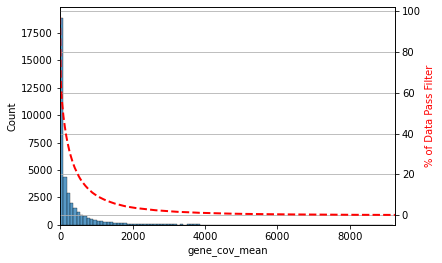

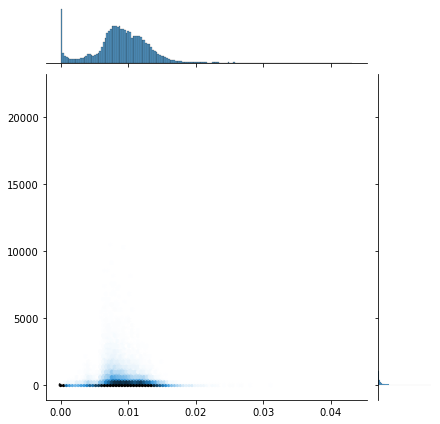

31427 features remained


/gale/netapp/home/wtian/sapiens/systmp/ipykernel_81753/3891784799.py:19: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  use_features &= feature_cov_mean[feature_cov_mean > min_cov].index
/gale/netapp/home/wtian/sapiens/systmp/ipykernel_81753/3891784799.py:20: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  use_features &= feature_cov_mean[feature_cov_mean > min_cov_ratio].index


In [9]:
with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    # still use all the cells to load MCDS
    mcds = MCDS.open(mcds_path_list, obs_dim=obs_dim,)
    use_cells = mcds.get_index('cell')
    use_genes = mcds.get_index('gene')
    use_cells = use_cells[use_cells.isin(adata.obs.index)]
    use_genes = use_genes[use_genes.isin(use_features)]
    mcds = mcds.sel({obs_dim:use_cells}).sel({var_dim: use_genes})
mcds.add_feature_cov_mean(var_dim=var_dim)

feature_cov_mean = mcds.coords[f'{var_dim}_cov_mean'].to_pandas()
feature_len = (mcds.coords['gene_end']-mcds.coords['gene_start']).to_pandas()
feature_cov_ratio = feature_cov_mean/feature_len

sns.jointplot(feature_cov_mean/feature_len, feature_cov_mean, kind='hex', gridsize=100, vmax=500)
plt.show()


use_features &= feature_cov_mean[feature_cov_mean > min_cov].index
use_features &= feature_cov_mean[feature_cov_mean > min_cov_ratio].index

print(f'{use_features.size} features remained')

In [10]:
mcds = MCDS.open(gene_mcds_path_pattern, obs_dim=obs_dim)
use_cells = mcds.get_index('cell')
use_cells = use_cells[use_cells.isin(adata.obs_names)]
use_genes2 = mcds.get_index('gene')
use_genes = use_genes2[use_genes2.isin(use_genes)]
with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    mcds = mcds.sel({obs_dim:use_cells}).sel({var_dim:use_genes})

In [14]:
pw_dmg_tables = {}
if len(adata.obs[cluster_col].unique())>1:
    mcds = mcds.chunk(1000)
    for mc_type in mc_types:
        pwdmg = PairwiseDMG(max_cell_per_group = pw_max_cell_per_group,
                            top_n=pw_top_n_markers,
                            adj_p_cutoff=pw_adj_p_cutoff,
                            delta_rate_cutoff=pw_delta_rate_cutoff,
                            auroc_cutoff=pw_auroc_cutoff,
                            random_state=random_state,
                            n_jobs=n_jobs)
        pwdmg.fit_predict(x=mcds[f'{var_dim}_da_frac'].sel(mc_type=mc_type), 
                          groups=adata.obs[cluster_col])
        pw_dmg_tables[mc_type] = pwdmg.dmg_table

In [16]:
ovr_dmg_tables = {}
if len(adata.obs[cluster_col].unique())>1:
    for mc_type in mc_types:
        ovr_dmg_tables[mc_type] = one_vs_rest_dmg(adata.obs,
                                              group=cluster_col,
                                              mcds=mcds,
                                              obs_dim=obs_dim,
                                              var_dim=var_dim,
                                              mc_type=mc_type,
                                              top_n=top_n_markers,
                                              adj_p_cutoff=adj_p_cutoff,
                                              fc_cutoff=fc_cutoff,
                                              auroc_cutoff=auroc_cutoff,
                                              max_cluster_cells=max_cluster_cells,
                                              max_other_fold=max_other_fold)


In [17]:
for mc_type in ovr_dmg_tables:
    ovr_dmg_tables[mc_type].to_pickle(f'{cluster_col}.{mc_type}.OneVsRestDMG.pdpkl')

In [18]:
for mc_type in ovr_dmg_tables:
    print(ovr_dmg_tables[mc_type]['cluster'].value_counts())

In [19]:
for mc_type in pw_dmg_tables:
    pw_dmg_tables[mc_type].to_pickle(f'{cluster_col}.{mc_type}.PairwiseDMG.pdpkl')